<h1>Dhrumil Parikh</h1>

<h2>Project Name:- Sales Prediction Using Python</h2>

<h3><b>Project Summary:-</b></h3>

<h5><b>Objective:</b></h5>
  In this data science project, the goal is to predict future sales for product and service-based businesses. The prediction factors include advertising expenditures, audience segmentation, and advertising platforms.


<h5><b>Scope:</b></h5>
Sales prediction is a critical tool for businesses, aiding in decision-making related to advertising costs and strategies. The project employs Python for machine learning to forecast future sales.

<h5><b>Key Components:</b></h5>

<b>Advertising Expenditure Analysis:</b>  Explore the impact of advertising costs on sales predictions.<br>
<b>Audience Segmentation:</b> Understand how different audience segments contribute to variations in sales.<br>
<b>Platform Influence:</b> Investigate the role of advertising platforms in shaping sales outcomes.<br><br>
<b>Implementation:</b><br>
Python will be the primary tool for implementing machine learning models. Techniques such as regression analysis and predictive modeling will be employed.
<br>

<b>Outcome:</b><br>
The project aims to deliver a robust sales prediction model, enabling businesses to make data-driven decisions, optimize advertising strategies, and enhance operational efficiency.



<h3>1. Know The Data!</h3>

<h4>Import Libraries</h4>

In [3]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor


# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display



In [5]:
df=pd.read_csv('advertising.csv')

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
dup = df.duplicated().sum()
dup


0

In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<h3>2. Understanding The Variables</h3>

In [14]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [15]:
df.describe(include= 'all').round(2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


Checking any Unique Values for each variable.

In [16]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


<h3>Data Vizualization, Storytelling & Experimenting with cahrts: Understand the relationships between variables</h3>

Chart - 1: Numerical Variable vs Target Variable

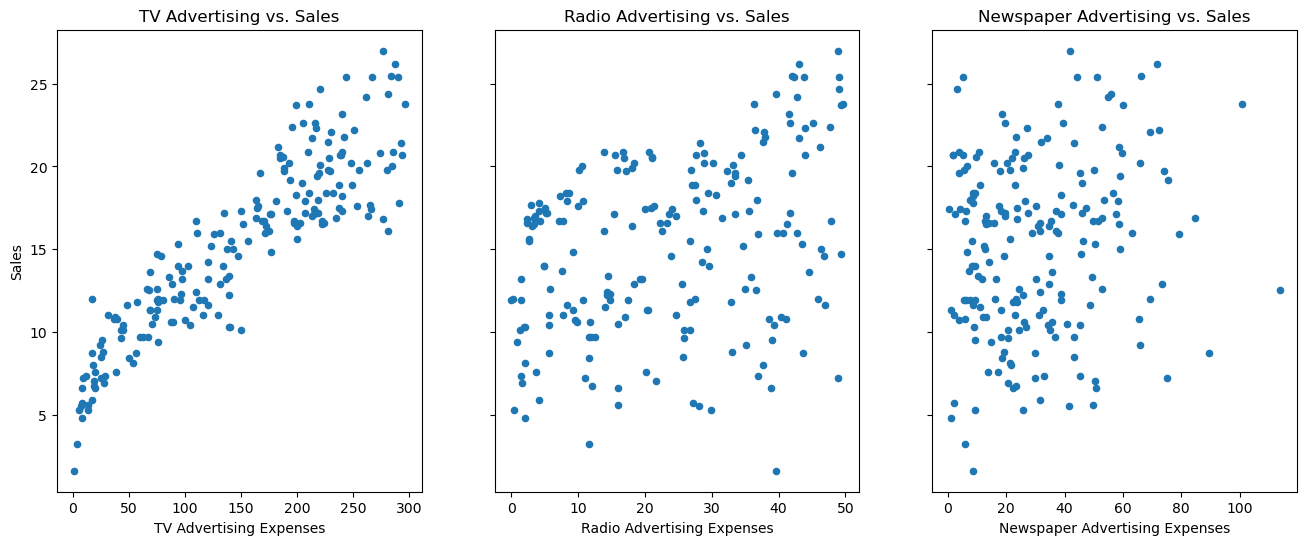

In [17]:
# Chart - 1 Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()
     

<h4>Key insights i got from these charts is:</h4>
As seen, TV sales and Radio sales are significantly increasing.
<br>
Outliers are present in Newspaper advertising vs. Sales graph.

<h3>Chart -2 Correlation Heatmap</h3>

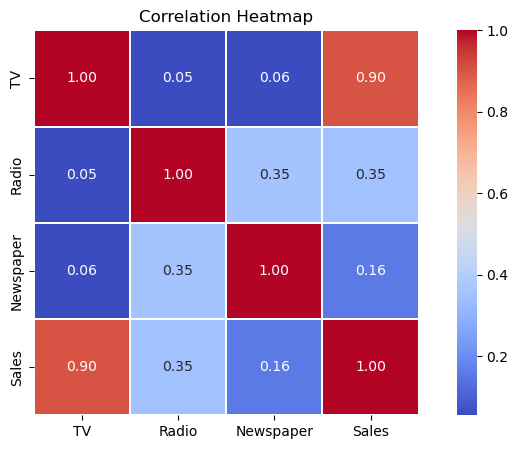

In [18]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

From the above heatmap i came to know that TV Advertising expenses and Sales are highly Correlated.

<h3><b>4. Feature Engineering & Data Pre-processing</b></h3>

<b>1. Handling Outliers</b>

In [19]:
df=df[df['Newspaper']<=90]

In [20]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [21]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
continuous_variables = ['TV', 'Radio', 'Newspaper']
continuous_feature_df = pd.DataFrame(df[continuous_variables])
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [25]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [26]:
features = [i for i in df.columns if i not in ['Sales']]

In [27]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

<h3><b>3. Data Transformation</b></h3>

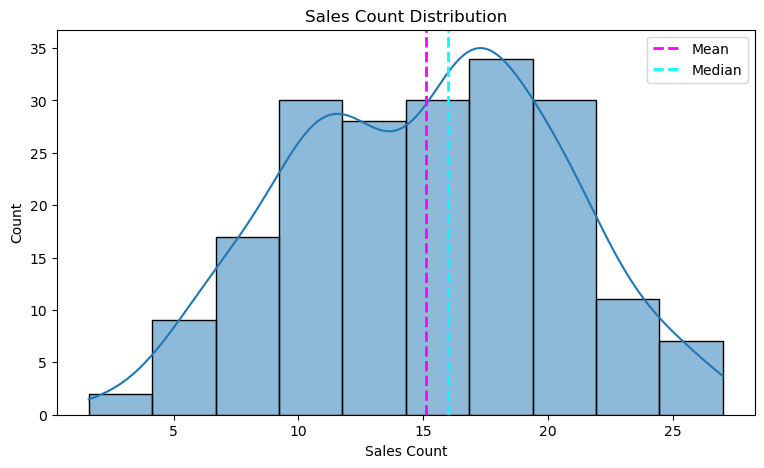

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dependent variable (target column)
dependent_variable = 'Sales'  # Replace 'Sales' with the actual column name in your dataset

# Check if the column exists
if dependent_variable in df.columns:
    plt.figure(figsize=(9, 5))
    sns.histplot(df[dependent_variable], kde=True)  # Replacing deprecated sns.distplot()

    plt.xlabel('Sales Count')
    plt.title('Sales Count Distribution')

    # Add mean and median lines
    plt.axvline(df[dependent_variable].mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(df[dependent_variable].median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')

    plt.legend()
    plt.show()
else:
    print(f"Error: Column '{dependent_variable}' not found in the dataset!")


In [33]:
df[dependent_variable].skew()

-0.07967637330908452

In [36]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [37]:
features

['TV', 'Radio', 'Newspaper']

<h3><b>4. Data Scaling</b></h3>

In [38]:
features = [i for i in df.columns if i not in ['Sales']]

<h3><b>5. Data Splitting</b></h3>


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
     

In [40]:
y_train.value_counts()

Sales
11.9    4
20.7    4
16.7    4
17.2    3
12.0    3
       ..
14.6    1
13.7    1
18.3    1
27.0    1
15.6    1
Name: count, Length: 105, dtype: int64

<h3><b>6. ML Model Implementation</b></h3>

In [41]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [42]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

<h4><b>ML Model -1: Linear Regression</b></h4>

In [43]:

# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

<h5><b>1. Performance of the model using Evaluation metric Score Chart. </b></h5>

MSE : 2.7071637512130193
RMSE : 1.6453460885822835
MAE : 1.1780466149681035
Train R2 : 0.8995394667395139
Test R2 : 0.9026978637834333
Adjusted R2 :  0.8945893524320527


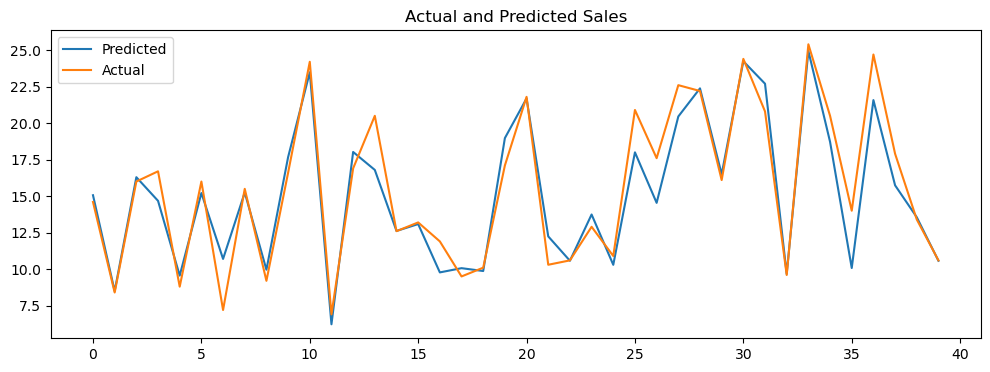

In [44]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [45]:
score

,Linear regression
MSE,2.707164
RMSE,1.645346
MAE,1.178047
Train R2,0.899539
Test R2,0.902698
Adjusted R2,0.894589


<h3>ML Model -2: Ridge Regression</h3>

In [46]:

# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 2.7071599459316564
RMSE : 1.6453449322046902
MAE : 1.1780454912060587
Train R2 : 0.8995394666562332
Test R2 : 0.9026980005546226
Adjusted R2 :  0.8945895006008411


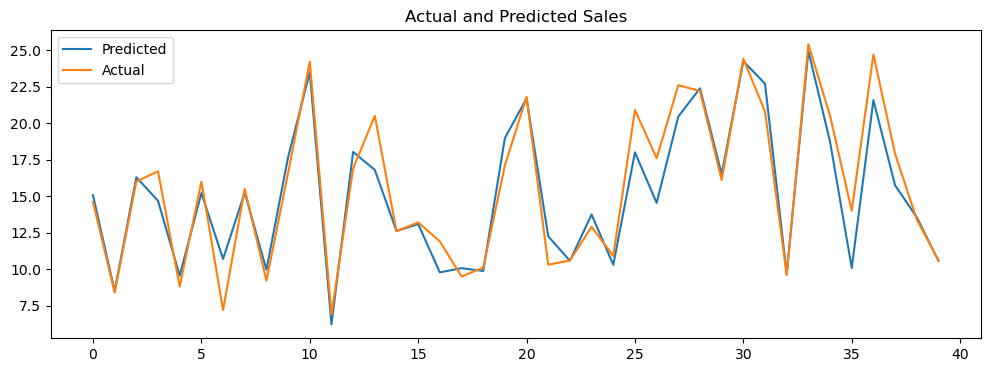

In [47]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [48]:
score

,Linear regression,Ridge
MSE,2.707164,2.707160
RMSE,1.645346,1.645345
MAE,1.178047,1.178045
Train R2,0.899539,0.899539
Test R2,0.902698,0.902698
Adjusted R2,0.894589,0.894590


<h3>ML Model -3: Decision Tree</h3>

In [49]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE : 2.124249999999999
RMSE : 1.4574807031312624
MAE : 0.9974999999999998
Train R2 : 1.0
Test R2 : 0.9236492204191835
Adjusted R2 :  0.9172866554541155


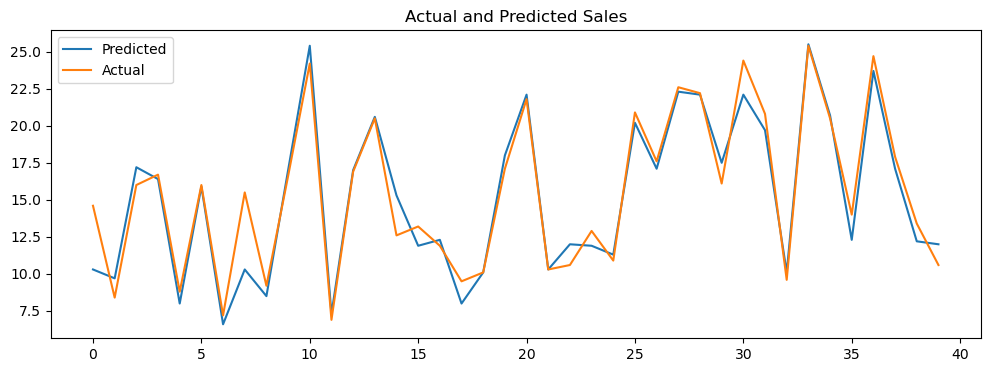

In [50]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [51]:
score

,Linear regression,Ridge,Decision tree
MSE,2.707164,2.707160,2.124250
RMSE,1.645346,1.645345,1.457481
MAE,1.178047,1.178045,0.997500
Train R2,0.899539,0.899539,1.000000
Test R2,0.902698,0.902698,0.923649
Adjusted R2,0.894589,0.894590,0.917287


<h3>ML Model -4: Random Forest</h3>

In [52]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

MSE : 1.2973673999999986
RMSE : 1.139020368562388
MAE : 0.9320499999999988
Train R2 : 0.9924061190505885
Test R2 : 0.9533694186688304
Adjusted R2 :  0.9494835368912329


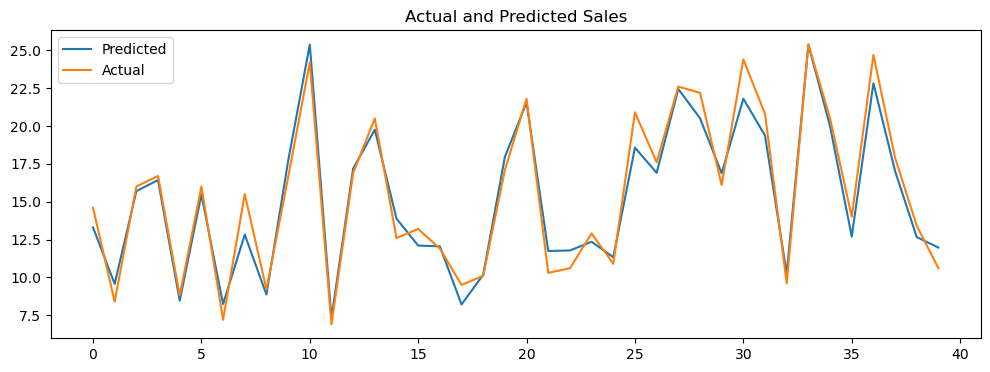

In [53]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [54]:
score

,Linear regression,Ridge,Decision tree,Random forest
MSE,2.707164,2.707160,2.124250,1.297367
RMSE,1.645346,1.645345,1.457481,1.139020
MAE,1.178047,1.178045,0.997500,0.932050
Train R2,0.899539,0.899539,1.000000,0.992406
Test R2,0.902698,0.902698,0.923649,0.953369
Adjusted R2,0.894589,0.894590,0.917287,0.949484


<h3>Selection of Best Model</h3>

In [55]:
# Removing the overfitted models which have R2 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Train R2']==1].index  # creating a list of models which have 1 for train and score_t['Train R2']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.707164,1.645346,1.178047,0.899539,0.902698,0.894589
Ridge,2.707160,1.645345,1.178045,0.899539,0.902698,0.894590
Random forest,1.297367,1.139020,0.932050,0.992406,0.953369,0.949484


In [56]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [57]:
metrics = ['R2']

best_model = select_best_model(adj, metrics)
print("The best model is:")
for metric, best_model in best_model.items():
    print(f"{metric}: {best_model} - {adj['Test '+metric][best_model].round(4)}")
     

The best model is:
R2: Random forest - 0.9534


In [58]:
# Take R2 score as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2']==1].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['MSE','RMSE','MAE','Adjusted R2'], axis=1)
new_score.index.name = 'Regression Model'
print(new_score.to_markdown())
     

| Regression Model   |   Train R2 |   Test R2 |
|:-------------------|-----------:|----------:|
| Linear regression  |   0.899539 |  0.902698 |
| Ridge              |   0.899539 |  0.902698 |
| Random forest      |   0.992406 |  0.953369 |


<h2><b>Conclusion</b></h2>

In the dynamic landscape of product and service-based businesses, the ability to forecast sales is paramount. This project, undertaken during the data science internship at CodSoft, delved into the realm of sales prediction using machine learning with Python. Some of the key findings:<br>

<b>Insights and Observations:</b><br>
Sales exhibit a positive correlation with both TV and Radio advertising expenses, signifying the effectiveness of these channels.<br>
Notably, there's a strong correlation between TV advertising expenses and sales, emphasizing the impact of TV advertising on driving sales.<br>
The R2 score, chosen as the evaluation metric, showcased the accuracy of the model in predicting sales.<br>
The Random Forest model emerged as the preferred choice, achieving an impressive 99% training accuracy and 95% testing accuracy.<br>




This project not only addresses the real-life situation as provided in the dataset of sales prediction but also highlights the vital role of data science in optimizing business strategies in real-life world. The findings contribute to informed decision-making, offering, offering valuable insights for future sales initiatives.

<H5><b>Thankyou CodSoft for this valuable internship programee!!</b></H5>